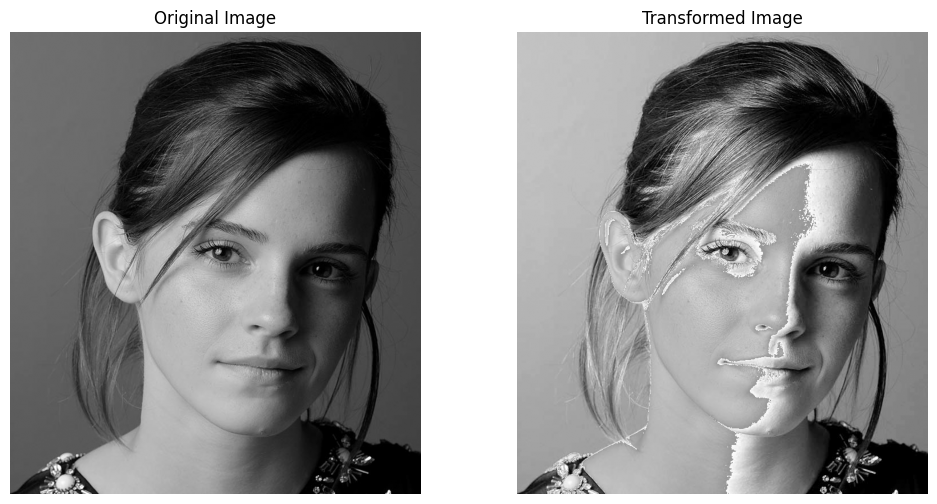

In [1]:
!pip install opencv-python matplotlib numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale)
img = cv2.imread("emma.jpg", cv2.IMREAD_GRAYSCALE)

# Define piecewise transformation function
def intensity_transform(r):
    if r < 50:
        return (100/50) * r   # slope = 100/50
    elif r < 150:
        return 100 + (155/100) * (r - 50)   # slope = 155/100
    else:
        return 150 + (105/105) * (r - 150)  # slope = 105/105 = 1

# Vectorize function for efficiency
transform_vec = np.vectorize(intensity_transform)

# Apply transformation
transformed_img = transform_vec(img).astype(np.uint8)

# Show results
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Transformed Image")
plt.imshow(transformed_img, cmap="gray")
plt.axis("off")

plt.show()

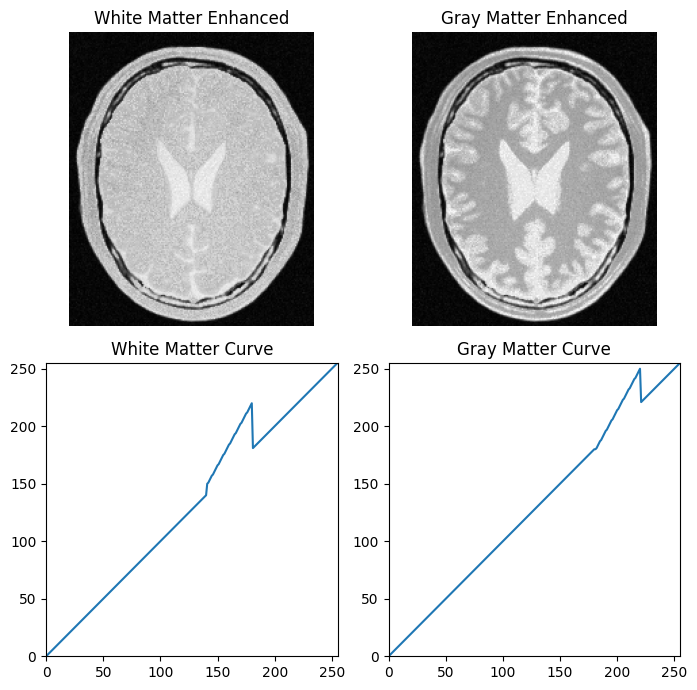

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale brain image
img_orig = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# White matter LUT (identity first)
t_white = np.arange(256, dtype='uint8')
t_white[141:181] = np.linspace(150, 220, 40).astype('uint8')  # stretch this range

# Gray matter LUT (identity first)
t_gray = np.arange(256, dtype='uint8')
t_gray[181:221] = np.linspace(180, 250, 40).astype('uint8')   # stretch this range

# Apply transformations
white_matter = cv.LUT(img_orig, t_white)
gray_matter  = cv.LUT(img_orig, t_gray)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

ax[0,0].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title("White Matter Enhanced")
ax[0,0].axis("off")

ax[1,0].plot(t_white)
ax[1,0].set_title("White Matter Curve")
ax[1,0].set_ylim([0, 255])
ax[1,0].set_xlim([0, 255])

ax[0,1].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title("Gray Matter Enhanced")
ax[0,1].axis("off")

ax[1,1].plot(t_gray)
ax[1,1].set_title("Gray Matter Curve")
ax[1,1].set_ylim([0, 255])
ax[1,1].set_xlim([0, 255])

plt.tight_layout()
plt.show()


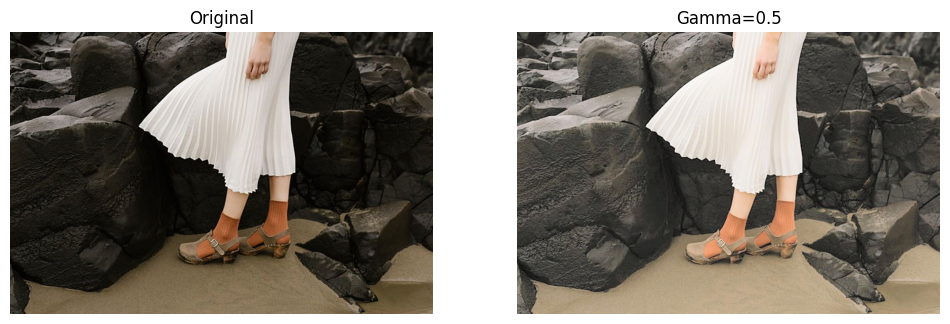

/tmp/ipython-input-2011210915.py:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(1,2,1), plt.hist(L.ravel(), 256, [0,256]), plt.title("Original L*")
/tmp/ipython-input-2011210915.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(1,2,2), plt.hist(L_corr.ravel(), 256, [0,256]), plt.title(f"Corrected L* (γ={gamma})")


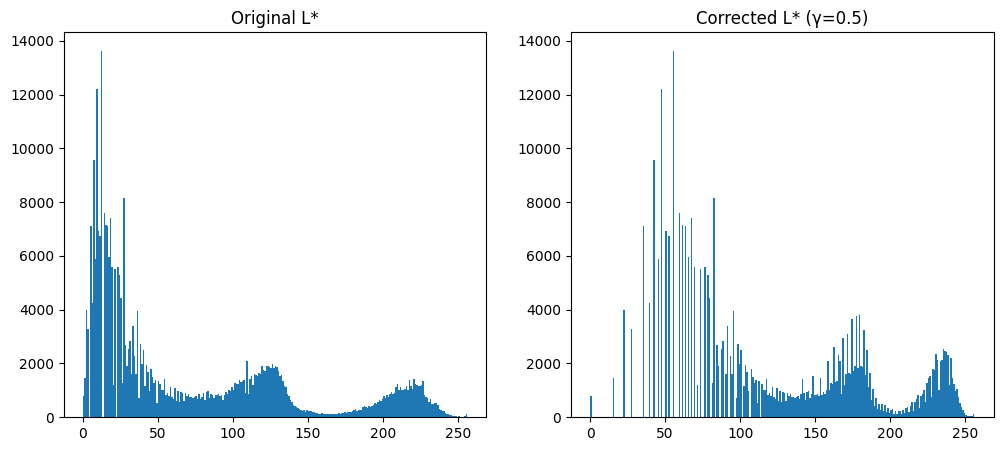

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("highlights_and_shadows.jpg")   # change to your file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Lab and split
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)
# Pick gamma value
gamma = 0.5   # <1 brightens, >1 darkens

# Apply gamma correction on L channel
L_corr = np.power(L/255.0, gamma) * 255
L_corr = L_corr.astype("uint8")

# Merge back and convert to RGB
lab_corr = cv2.merge([L_corr, a, b])
img_corr = cv2.cvtColor(lab_corr, cv2.COLOR_Lab2RGB)

# Show original vs corrected
plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(img_rgb), plt.title("Original"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(img_corr), plt.title(f"Gamma={gamma}"), plt.axis("off")
plt.show()

# Show histograms
plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.hist(L.ravel(), 256, [0,256]), plt.title("Original L*")
plt.subplot(1,2,2), plt.hist(L_corr.ravel(), 256, [0,256]), plt.title(f"Corrected L* (γ={gamma})")
plt.show()


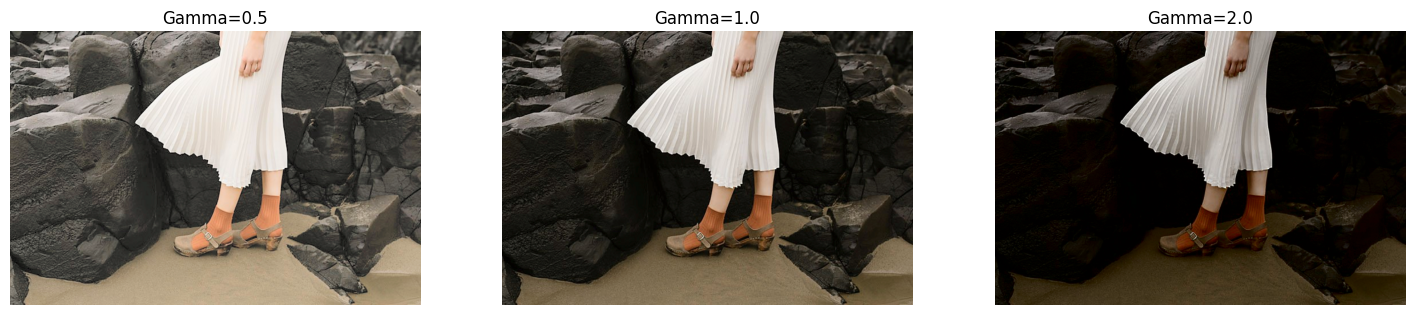

/tmp/ipython-input-843893653.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(L_corr.ravel(), 256, [0,256])


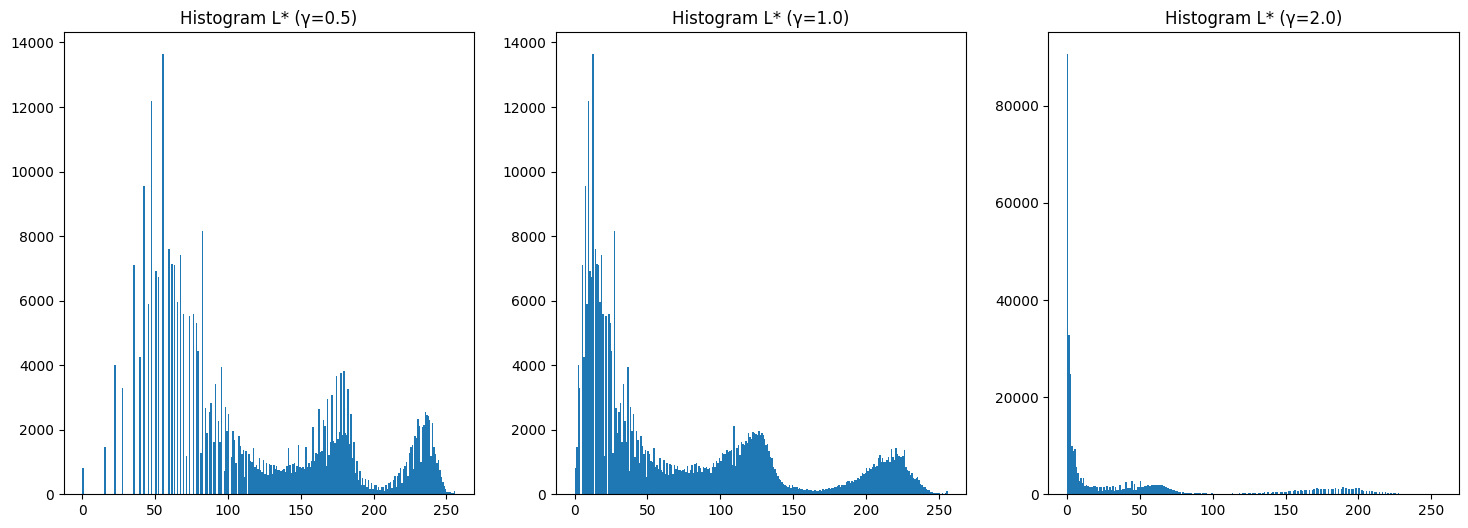

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("highlights_and_shadows.jpg")   # change to your file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Lab and split
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)

# Define gamma values
gamma_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(18,6))
for i, gamma in enumerate(gamma_values):
    # Apply gamma correction on L channel
    L_corr = np.power(L/255.0, gamma) * 255
    L_corr = L_corr.astype("uint8")

    # Merge back and convert to RGB
    lab_corr = cv2.merge([L_corr, a, b])
    img_corr = cv2.cvtColor(lab_corr, cv2.COLOR_Lab2RGB)

    # Show corrected images
    plt.subplot(1, len(gamma_values), i+1)
    plt.imshow(img_corr)
    plt.title(f"Gamma={gamma}")
    plt.axis("off")
plt.show()

# Show histograms of L* channel
plt.figure(figsize=(18,6))
for i, gamma in enumerate(gamma_values):
    L_corr = np.power(L/255.0, gamma) * 255
    L_corr = L_corr.astype("uint8")

    plt.subplot(1, len(gamma_values), i+1)
    plt.hist(L_corr.ravel(), 256, [0,256])
    plt.title(f"Histogram L* (γ={gamma})")
plt.show()
